#  Project Title: Price prediction in ride-hailing services based on weather conditions

## Project Description:
Uber and Lyft's ride prices are not constant like public transport. They are greatly affected by the demand and supply of rides at a given time. So what exactly drives this demand? The first guess would be the time of the day; times around 9 am and 5 pm should see the highest surges on account of people commuting to work/home. Another guess would be the weather; rain/snow should cause more people to take rides.

The data is approx. for a week of Nov '18 ( I actually have included data collected while I was testing the 'querying' application so might have data spread out over more than a week. I didn't consider this as a time-series problem so did not worry about regular interval. The chosen interval was to query as much as data possible without unnecessary redundancy. So data can go from end week of Nov to few in Dec)
The Cab ride data covers various types of cabs for Uber & Lyft and their price for the given location. You can also find if there was any surge in the price during that time. Weather data contains weather attributes like temperature, rain, cloud, etc for all the locations taken into consideration.

#  DATA

## Source of Data

We have acquired this dataset from  kaggle https://www.kaggle.com/ravi72munde/uber-lyft-cab-prices.

## Description of Data

The dataset contains 10 features along with the price for 693071 observations. Later we add few more derived features to this dataset.<br>The date is in timestamp format. So we change that timestamp into date format, the date attribute is added to the dataset and timestamp attribute is removed. Few attributes are added like hour, fare_per_mile. The description for the 10 features is given below:<br>

 <style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
        }
td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}
</style>
  <table>
  <tr>
    <th>Feature</th>
    <th>Description</th>
    </tr>
  <tr>
    <td>Distance</td>
    <td>Distance between source and destination of the cab ride</td>
    </tr>
  <tr>
    <td>cab_type</td>
    <td>The type of uber car or lyft booked.</td>
    </tr>
  <tr>
    <td>time_stamp</td>
    <td>Measured timestamp</td>
    </tr>
  <tr>
    <td>destination</td>
    <td>The destination of the cab ride</td>
    </tr>
  <tr>
    <td>source</td>
    <td>The source of a cab ride</td>
    </tr>
  <tr>
    <td>price</td>
    <td>Total estimated price of the cab ride.</td>
    </tr><tr>
    <td>name</td>
    <td>Name of the Uber/Lyft product</td>
    </tr>
    <tr>
    <td>Surge_multiplier</td>
    <td>This is the factor by which a normal cab fare is multiplied.If it is 1 it means that there is no surge.</td>
    </tr>
    <tr>
    <td>id</td>
    <td>Unique id per ride</td>
    </tr>
    <tr>
    <td>product_id</td>
    <td>Unique id of a particular product of Lyft or Uber. </td>
    </tr>
</table>

The other dataset we are merging with cabs_rides is weather_data.We have 8 features and 6276 entries in this.We use time_stamp feature to merge with the cab_rides data. 

<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
        }
td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}
</style>
  <table>
  <tr>
    <th>Feature</th>
    <th>Description</th>
    </tr>
  <tr>
    <td>temp</td>
    <td>Average temperature for a particular day</td>
    </tr>
  <tr>
    <td>location</td>
    <td>Aread in boston where the temperature was recorded.</td>
    </tr>
  <tr>
    <td>clouds</td>
    <td>Measured timestamp</td>
    </tr>
  <tr>
    <td>pressure</td>
    <td>The destination of the cab ride</td>
    </tr>
  <tr>
    <td>rain</td>
    <td>Amount of precipitation</td>
    </tr>
  <tr>
    <td>time_stamp</td>
    <td>Measured timestamp in a day</td>
    </tr>
    <tr>
    <td>Humidity</td>
    <td>Humidity percentage in the climate.</td>
    </tr>
    <tr>
    <td>Wind</td>
    <td>Wind speed recorded for a particular day</td>
    </tr>
    </table>



# CRISM-DM PROCESS

## Importing the dataset

In [1]:
#Importing the neccessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn import preprocessing
import datetime
#Importing the neccessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
import datetime
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split


In [2]:
#Importing our dataset
df_cab=pd.read_csv('Datasets/cab_rides.csv')
#Creating an index label for the dataset
df_cab.reset_index(drop=True, inplace=True)

 We need to identify the charecteristics of our dataset .For this we use three methods:-             
 info()-Used for identifying the different features and data types in a dataset.<br>
 shape()-We used this method to get an idea of  the rows and columns in a dataframe.<br>
 head()-We  used this method to examine the first few rows of the dataset<br>
 describe()-We used this method to identify the summary statistic's of all the features of the dataset.

In [3]:
df_cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          693071 non-null  float64
 1   cab_type          693071 non-null  object 
 2   time_stamp        693071 non-null  int64  
 3   destination       693071 non-null  object 
 4   source            693071 non-null  object 
 5   price             637976 non-null  float64
 6   surge_multiplier  693071 non-null  float64
 7   id                693071 non-null  object 
 8   product_id        693071 non-null  object 
 9   name              693071 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ MB


In [4]:
df_cab.shape

(693071, 10)

In [5]:
df_cab = df_cab.iloc[0:30000, :]
df_cab.shape

(30000, 10)

In [6]:
df_cab.head(2)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux


In [8]:
df_cab.describe()

,distance,time_stamp,price,surge_multiplier
count,30000.000000,3.000000e+04,27637.000000,30000.000000
mean,2.162571,1.544031e+12,16.498245,1.015458
std,1.123125,6.878651e+08,9.277613,0.097601
min,0.020000,1.543204e+12,2.500000,1.000000
25%,1.260000,1.543439e+12,9.000000,1.000000
50%,2.120000,1.543724e+12,13.500000,1.000000
75%,2.870000,1.544816e+12,22.500000,1.000000
max,7.460000,1.545161e+12,92.000000,2.500000


# DATA CLEANING  AND PREPROCCESSING

For data cleaning these were the steps that we followed:-<br>
1.We identified the null values in our dataset.<br>
2.We identified the count's of different features.<br>
3.We performed imputation of the null  price column using fare per pile.

In [9]:
df_cab.isnull().sum()

distance               0
cab_type               0
time_stamp             0
destination            0
source                 0
price               2363
surge_multiplier       0
id                     0
product_id             0
name                   0
dtype: int64

In [10]:
df_cab['cab_type'].value_counts()

cab_type
Uber    16483
Lyft    13517
Name: count, dtype: int64

In [11]:
df_cab['destination'].value_counts()

destination
North End                  2675
Haymarket Square           2672
Northeastern University    2652
Fenway                     2612
Theatre District           2499
Beacon Hill                2485
North Station              2481
Back Bay                   2437
Boston University          2412
West End                   2388
Financial District         2380
South Station              2307
Name: count, dtype: int64

In [12]:
df_cab['source'].value_counts()

source
Theatre District           2695
Fenway                     2691
North Station              2555
Beacon Hill                2542
Haymarket Square           2524
Financial District         2523
West End                   2512
Back Bay                   2503
North End                  2481
Northeastern University    2428
South Station              2299
Boston University          2247
Name: count, dtype: int64

In [13]:
df_cab['surge_multiplier'].value_counts()

surge_multiplier
1.00    29005
1.25      526
1.50      219
1.75      125
2.00      117
2.50        8
Name: count, dtype: int64

In [14]:
df_cab['name'].value_counts()

name
Taxi            2363
UberPool        2362
UberX           2354
UberXL          2353
Black           2351
Black SUV       2351
WAV             2349
Lux Black XL    2265
Lux             2262
Lux Black       2257
Lyft XL         2248
Shared          2247
Lyft            2238
Name: count, dtype: int64

We noticed that the time_stamp  attribute is not in a proper format so we converted it into a proper format.We also introduced a new attribute called fare_per_mile .This value was obtained by dividing the cab price and distance covered per ride.

In [15]:
import datetime
#convert 13digit time stamp to datetime format
df_cab['date_time']= pd.to_datetime(df_cab['time_stamp']/1000, unit='s')
df_cab['date']= df_cab['date_time'].dt.date
df_cab['day'] = df_cab.date_time.dt.dayofweek
df_cab['hour'] = df_cab.date_time.dt.hour
#extract hours only
df_cab['fare_per_mile']= round(df_cab.price/df_cab.distance,2)

In [16]:
#To check if cab data has changed.
df_cab.head(2)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date_time,date,day,hour,fare_per_mile
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16 09:30:07.890000105,2018-12-16,6,9,11.36
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2018-11-27 02:00:23.677000046,2018-11-27,1,2,25.00


In [17]:
#After conversion to a new column time we can delete the exisitng column
del df_cab['time_stamp']

We are using an imputation technique to replace the missing price values.We noticed that the missing values in the dataset are that of the type Uber-Taxi.The rate per mile in Boston for an UBER of the type 'TAXI'is a constant.The rate doesnt change irespective of the surge or weather conditions.Hence by multiplying the fare per mile and distance traveled in an Uber taxi,we were able to obtain the missing price.

In [20]:
df_cab['fare_per_mile'] = df_cab['fare_per_mile'].astype(float)  # Ensure float type
df_cab['fare_per_mile'] = df_cab['fare_per_mile'].fillna(2.8)  # Assign back
df_cab['price'] = df_cab['fare_per_mile'] * df_cab['distance']  # Perform multiplication


In [21]:
#After replacement checking if the change is reflected in the dataset.
df_cab.price.isnull().sum()

0

# Visualizations for Data Preprocessing

Visualizations help us understand the dsitribution of the  data better.For this purpose we explored several graphs ranging from heatmaps to count plots and bar plots.

In [22]:
#Mentioning our graph sizes
from pylab import rcParams
rcParams['figure.figsize'] = 16,10

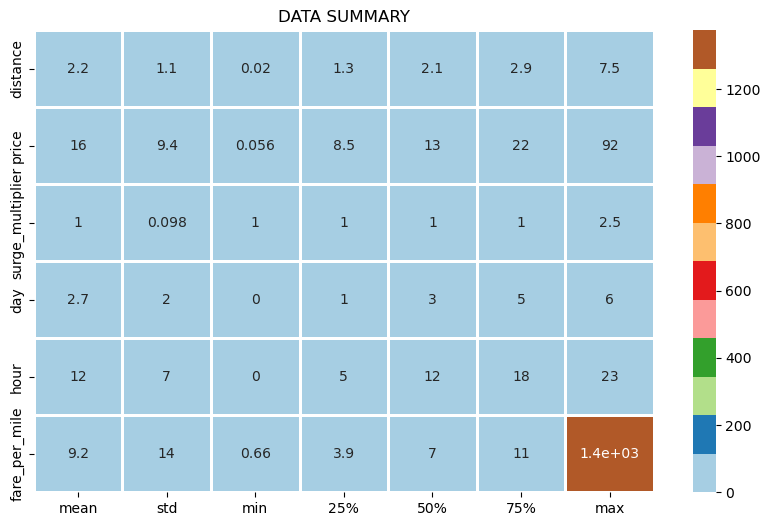

In [116]:
# Filter numeric columns for the heatmap
numeric_df = df_cab.select_dtypes(include=['number'])

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.describe()[1:].transpose(), annot=True, linecolor='w', linewidth=2, cmap=sns.color_palette('Paired'))
plt.title("DATA SUMMARY")
plt.show()

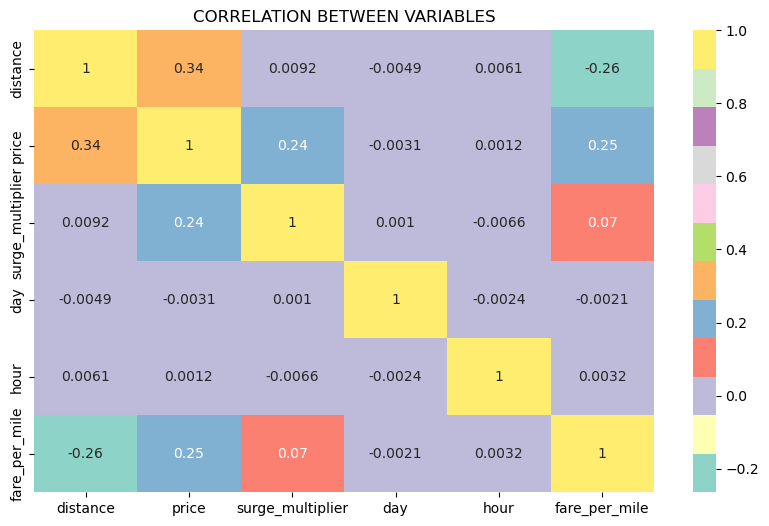

In [118]:
#Heatmap from searborn library
# Filter numeric columns for correlation calculation
numeric_df = df_cab.select_dtypes(include=['number'])

# Calculate the correlation matrix
df_corr = numeric_df.corr()

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_corr, cmap=sns.color_palette("Set3"), annot=True)
plt.title("CORRELATION BETWEEN VARIABLES")
plt.show()

This heatmap gave us an idea of the highly correlated variables.We observe that apart from the variable fare_per_mile .Distance and price have postive correlation whereas surge_multiper has positive correlation with price and negatve correlation with distance.

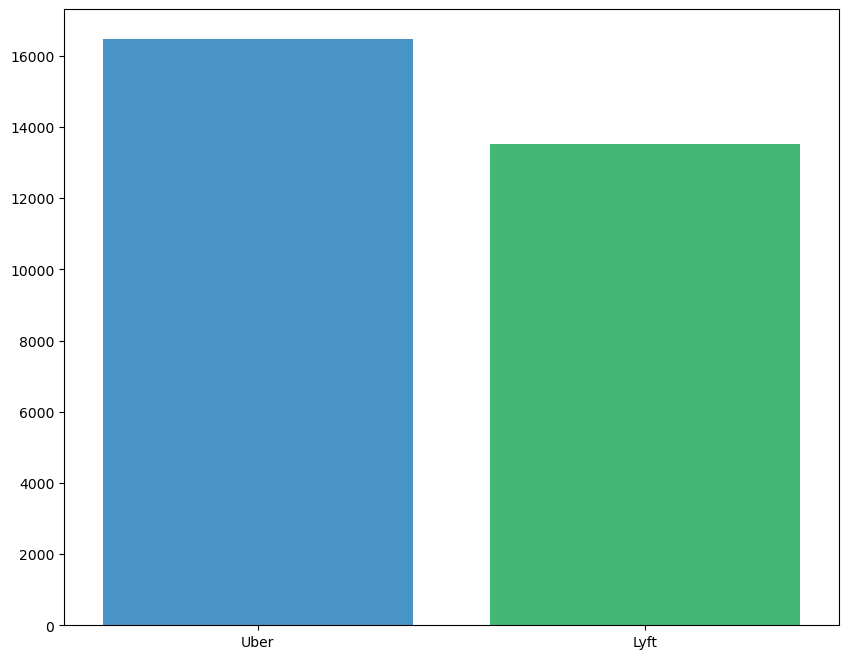

In [29]:
#Barplot  to display Uber Vs Lyft 

plt.figure(figsize=(10,8))
flatui = [ "#3498db", "#2ecc71"]
x=['Uber','Lyft']
y = [df_cab.cab_type[(df_cab.cab_type)=='Uber'].count(),df_cab.cab_type[(df_cab.cab_type)=='Lyft'].count()]
vis1 = sns.barplot(x=x, y=y, hue=x, palette=flatui, legend=False)


# Data preparation for Data preprocessing

We wanted to answer certain questions such as How does weather effect the surge? Does  it solely depend on weather only? and 
How each weather attribute effects surge?.This is when we realised that to answer these questions we need to merge our existing cab_rides dataset with weather data for each day in Boston.We used the time_stamp attribute as the common attribute between the two datasets.<br>
<b>NOTE:- </b><I>We use date to join both our data sets.As weather is recorded for an average day.</I>

In [146]:
#Import the new dataset and view the attributes
df_weather=pd.read_csv('Datasets/weather.csv')
df_weather.head(2)

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32


In [147]:
df_weather['rain'] = df_weather['rain'].fillna(0)


In [148]:
print(df_weather.columns)

Index(['temp', 'location', 'clouds', 'pressure', 'rain', 'time_stamp',
       'humidity', 'wind'],
      dtype='object')


In [149]:
#Splitting the time_stamp attribute in weather to two attributes which are time and data
df_weather['date_time'] = pd.to_datetime(df_weather['time_stamp'], unit='s')
del df_weather['time_stamp']

#df_weather['date_time']

In [150]:
#merge the datasets to refelect same time for a location
df_cab['merge_date'] = df_cab.source.astype(str) +" - "+ df_cab.date_time.dt.date.astype("str") +" - "+ df_cab.date_time.dt.hour.astype("str")
df_weather['merge_date'] = df_weather.location.astype(str) +" - "+ df_weather.date_time.dt.date.astype("str") +" - "+ df_weather.date_time.dt.hour.astype("str")
print(df_cab.head(2))
print(df_weather.head(2))

   distance cab_type    destination            source    price  \
0      0.44     Lyft  North Station  Haymarket Square   4.9984   
1      0.44     Lyft  North Station  Haymarket Square  11.0000   

   surge_multiplier                                    id    product_id  \
0               1.0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7     lyft_line   
1               1.0  4bd23055-6827-41c6-b23b-3c491f24e74d  lyft_premier   

     name                     date_time        date  day  hour  fare_per_mile  \
0  Shared 2018-12-16 09:30:07.890000105  2018-12-16    6     9          11.36   
1     Lux 2018-11-27 02:00:23.677000046  2018-11-27    1     2          25.00   

                          merge_date  
0  Haymarket Square - 2018-12-16 - 9  
1  Haymarket Square - 2018-11-27 - 2  
    temp     location  clouds  pressure    rain  humidity   wind  \
0  42.42     Back Bay     1.0   1012.14  0.1228      0.77  11.25   
1  42.43  Beacon Hill     1.0   1012.15  0.1846      0.76  11.32   

         

In [151]:
# Group by 'merge_date' and calculate the mean for numeric columns
df_weather_grouped = df_weather.groupby('merge_date').mean(numeric_only=True).reset_index()

# Display the first few rows of the grouped DataFrame
df_weather_grouped.head()

,merge_date,temp,clouds,pressure,rain,humidity,wind
0,Back Bay - 2018-11-26 - 10,40.695,0.995,1014.800,0.0000,0.940,1.895
1,Back Bay - 2018-11-26 - 11,40.185,0.955,1015.305,0.0000,0.940,2.260
2,Back Bay - 2018-11-26 - 12,40.315,0.920,1015.275,0.0000,0.935,2.940
3,Back Bay - 2018-11-26 - 13,41.950,0.910,1015.200,0.0031,0.910,3.545
4,Back Bay - 2018-11-26 - 14,42.765,0.905,1014.695,0.0044,0.910,2.960


In [153]:
#Merging based on the date and location.
df_merged = pd.merge(df_cab, df_weather, on='merge_date')
print(df_merged.shape)

(56781, 23)


In our newly formed merged dataset we perform info(),describe() and shape(),columns to understand the data.

In [154]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56781 entries, 0 to 56780
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   distance          56781 non-null  float64       
 1   cab_type          56781 non-null  object        
 2   destination       56781 non-null  object        
 3   source            56781 non-null  object        
 4   price             56781 non-null  float64       
 5   surge_multiplier  56781 non-null  float64       
 6   id                56781 non-null  object        
 7   product_id        56781 non-null  object        
 8   name              56781 non-null  object        
 9   date_time_x       56781 non-null  datetime64[ns]
 10  date              56781 non-null  object        
 11  day               56781 non-null  int32         
 12  hour              56781 non-null  int32         
 13  fare_per_mile     56781 non-null  float64       
 14  merge_date        5678

In [155]:
df_merged.shape

(56781, 23)

In [156]:
print(df_merged.columns)

Index(['distance', 'cab_type', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'date_time_x', 'date',
       'day', 'hour', 'fare_per_mile', 'merge_date', 'temp', 'location',
       'clouds', 'pressure', 'rain', 'humidity', 'wind', 'date_time_y'],
      dtype='object')


## Visualization of merged dataset

We have several new attributes in our merged dataset .We want visualize how these attributes contribute to our existing features such as surge,price,location cab_type and weather attributes such as rain.For visualization we have employed several plots which are catplots,countplots,boxplots,distplot and violionplot. 

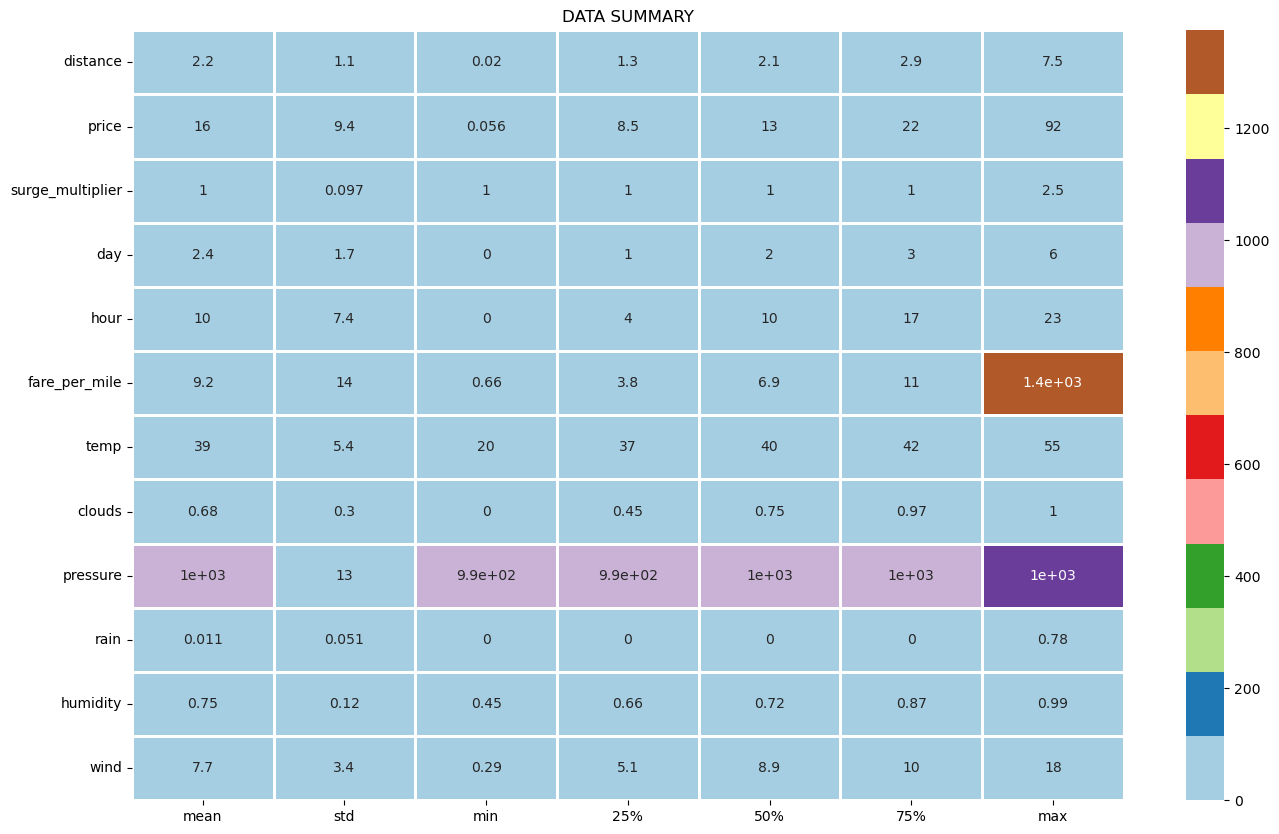

In [76]:
# Select only numeric columns for the heatmap
df_numeric = df_merged.select_dtypes(include=[np.number])

# Create the heatmap using only numeric columns
sns.heatmap(df_numeric.describe()[1:].transpose(), annot=True, linecolor='w', linewidth=2, cmap=sns.color_palette('Paired'))

# Title for the plot
plt.title("DATA SUMMARY")
plt.show()


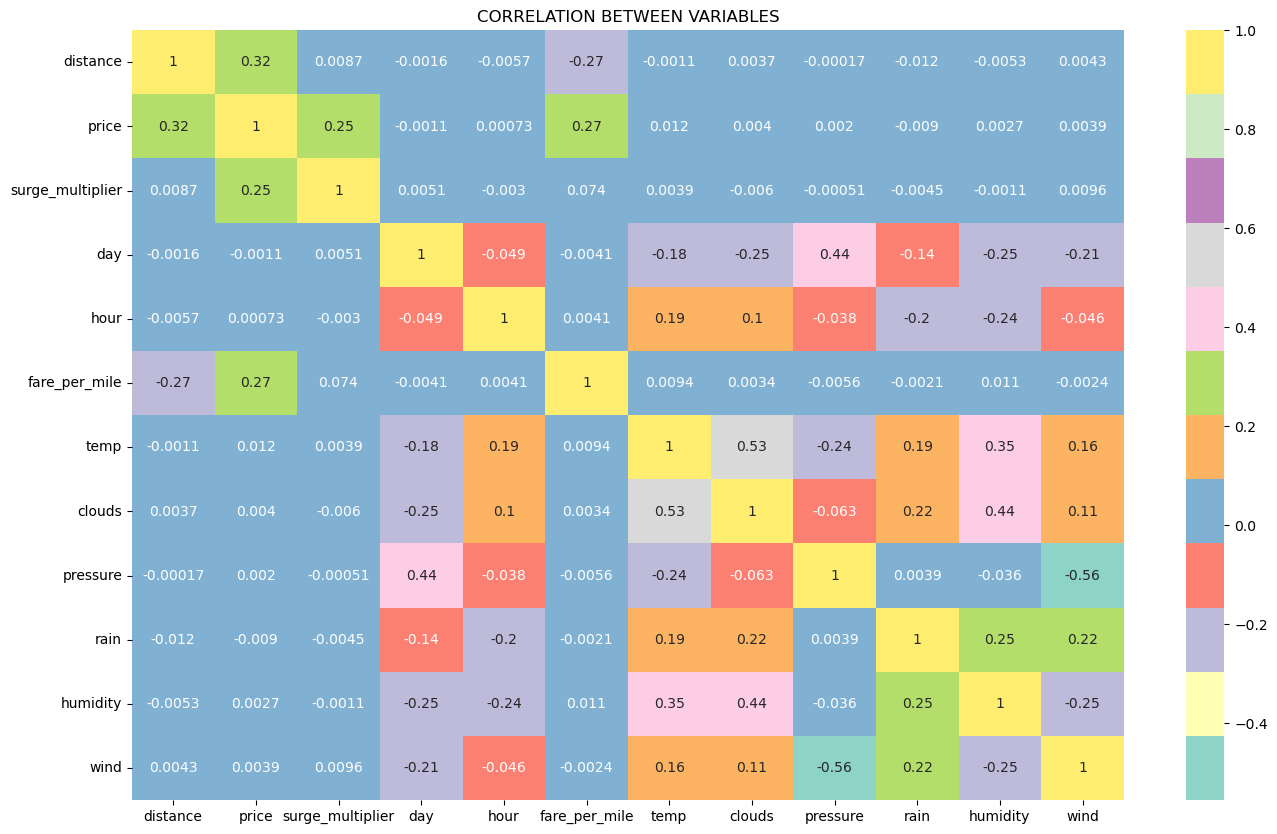

In [77]:
# Select only numeric columns for correlation
df_numeric = df_merged.select_dtypes(include=[np.number])

# Calculate the correlation matrix
df_corr = df_numeric.corr()

# Plot the heatmap
sns.heatmap(df_corr, cmap=sns.color_palette("Set3"), annot=True)
plt.title("CORRELATION BETWEEN VARIABLES")
plt.show()


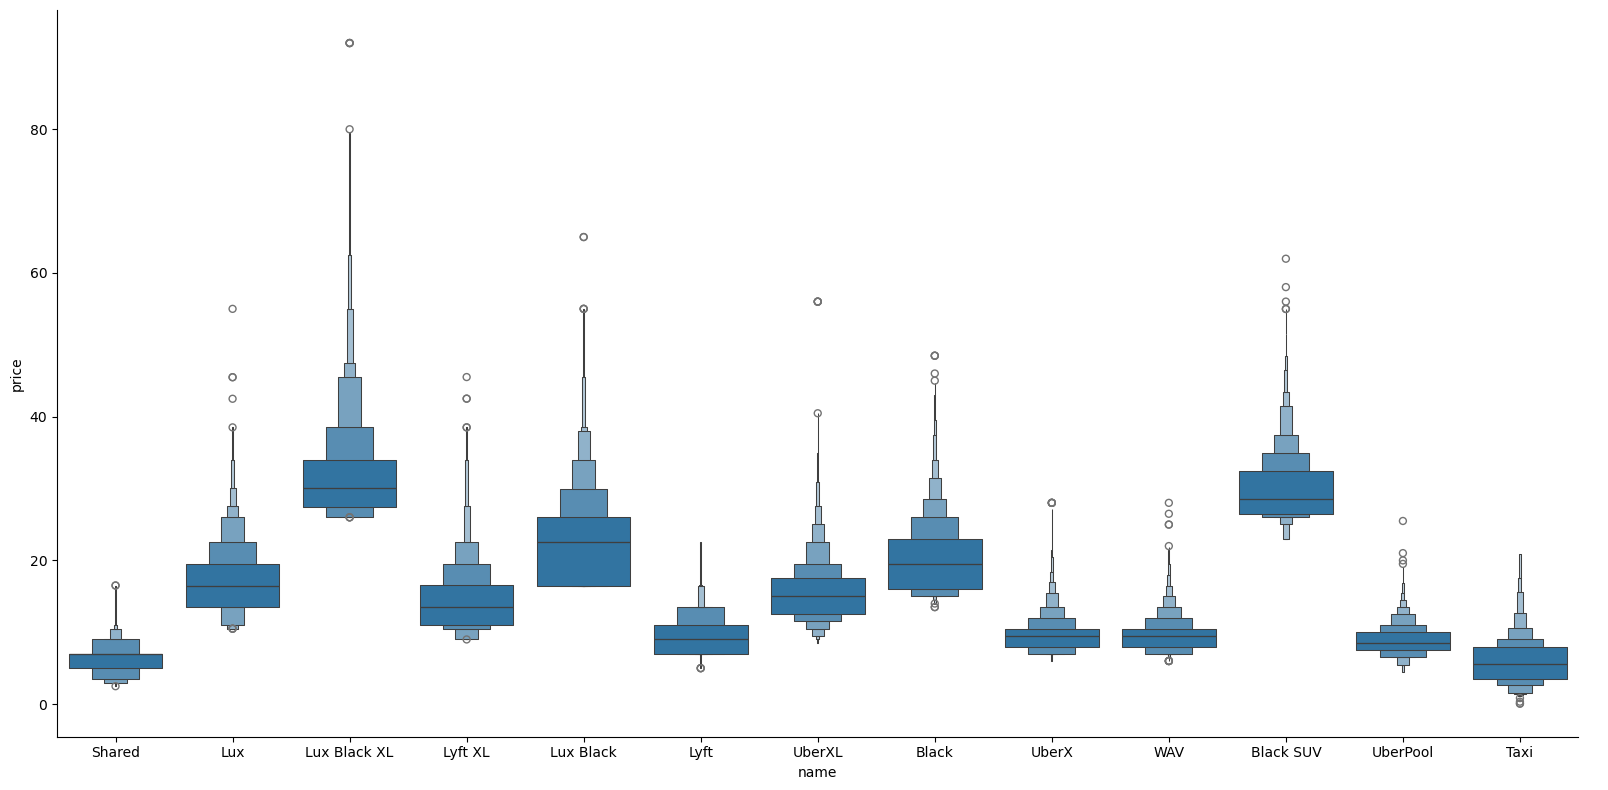

In [99]:
#Catplot
sns.catplot(x="name", y="price", data=df_merged,kind="boxen", height=8, aspect=2);

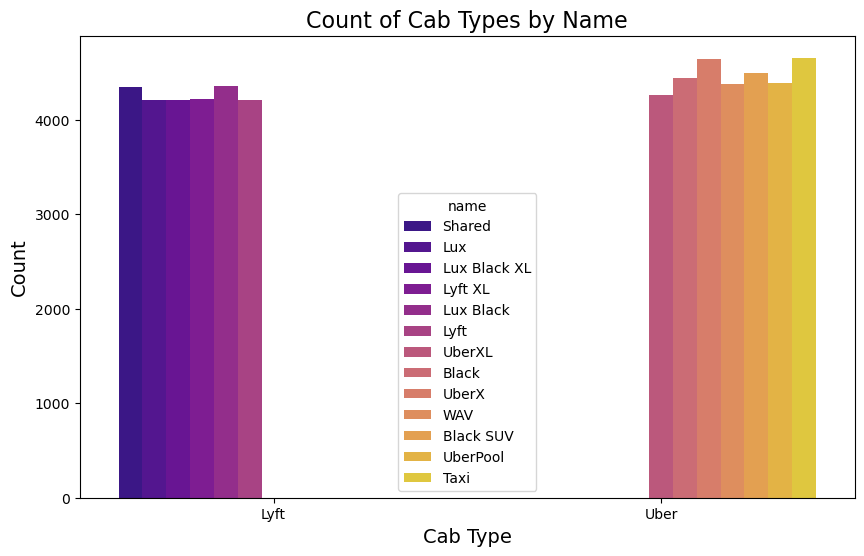

In [100]:
# Ensure the columns are categorical
df_merged['cab_type'] = df_merged['cab_type'].astype(str)
df_merged['name'] = df_merged['name'].astype(str)

# Create the countplot with proper spacing
plt.figure(figsize=(10, 6))  # Adjust the figure size
sns.countplot(x=df_merged['cab_type'], hue=df_merged['name'], palette='plasma', dodge=True)

# Add titles and labels
plt.title('Count of Cab Types by Name', fontsize=16)
plt.xlabel('Cab Type', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show the plot
plt.show()

C:\Users\karti\AppData\Local\Temp\ipykernel_8520\1174296055.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_merged, x='source',y='price',palette='Blues')


<Axes: xlabel='source', ylabel='price'>

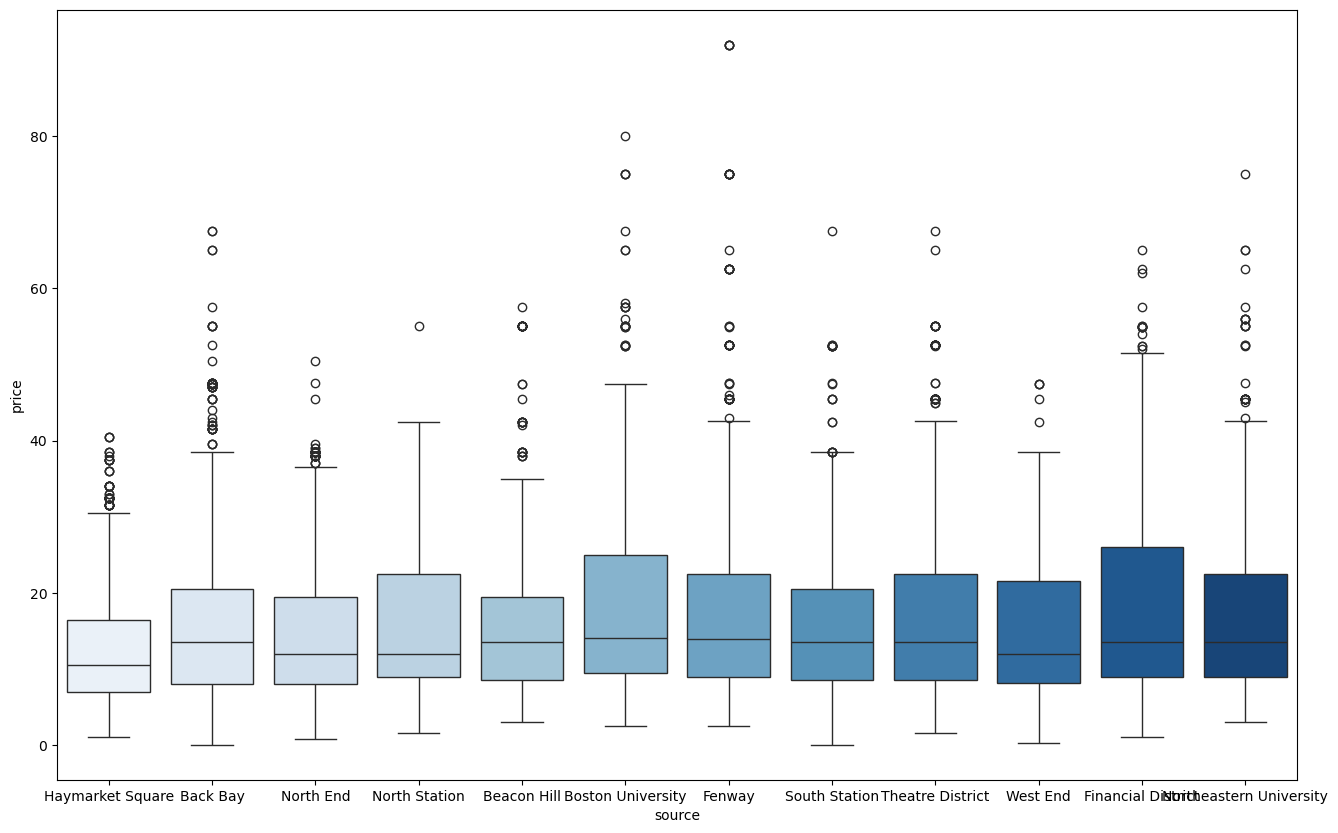

In [101]:
sns.boxplot(data=df_merged, x='source',y='price',palette='Blues')

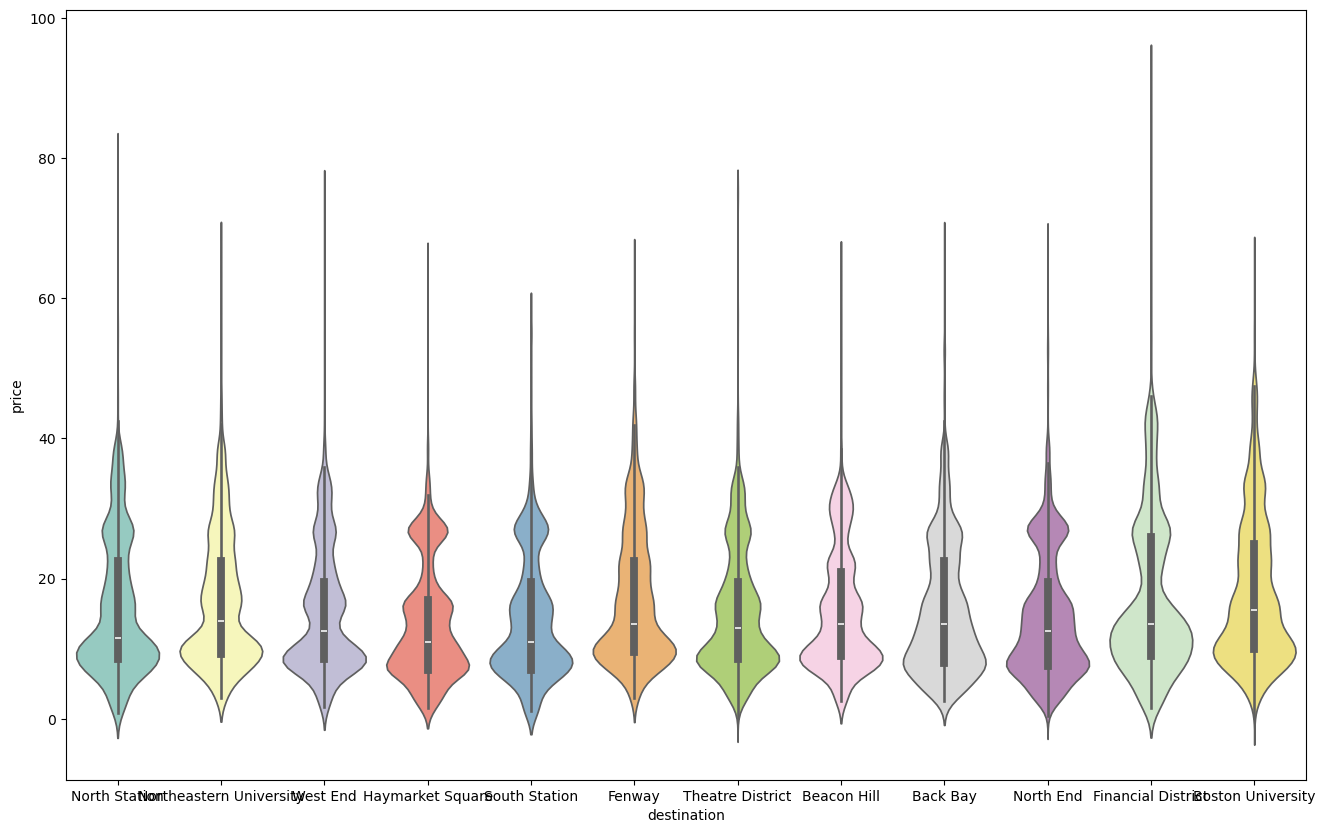

In [102]:
# Violin plot
sns.violinplot(data=df_merged, x='destination', y='price', hue='destination', 
               palette="Set3", density_norm='width', legend=False)

# Show the plot
plt.show()


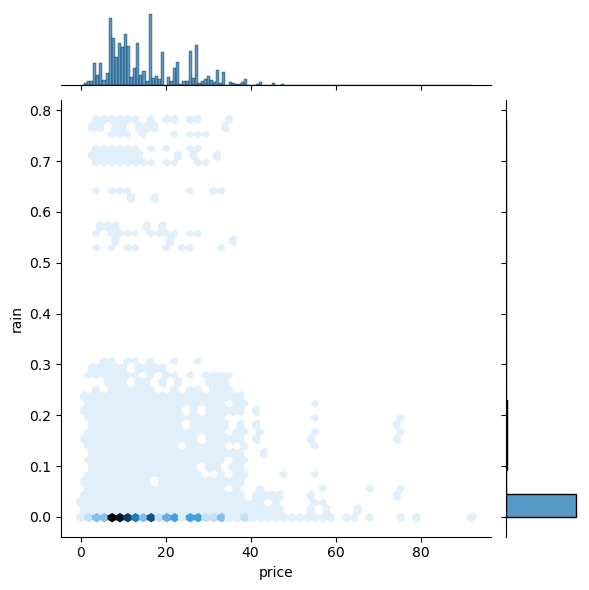

In [103]:
# Jointplot
sns.jointplot(x="price", y="rain", data=df_merged, kind="hex", bins=15)

# Show the plot
plt.show()


name
Black           Axes(0.125,0.11;0.775x0.77)
Black SUV       Axes(0.125,0.11;0.775x0.77)
Lux             Axes(0.125,0.11;0.775x0.77)
Lux Black       Axes(0.125,0.11;0.775x0.77)
Lux Black XL    Axes(0.125,0.11;0.775x0.77)
Lyft            Axes(0.125,0.11;0.775x0.77)
Lyft XL         Axes(0.125,0.11;0.775x0.77)
Shared          Axes(0.125,0.11;0.775x0.77)
Taxi            Axes(0.125,0.11;0.775x0.77)
UberPool        Axes(0.125,0.11;0.775x0.77)
UberX           Axes(0.125,0.11;0.775x0.77)
UberXL          Axes(0.125,0.11;0.775x0.77)
WAV             Axes(0.125,0.11;0.775x0.77)
Name: price, dtype: object

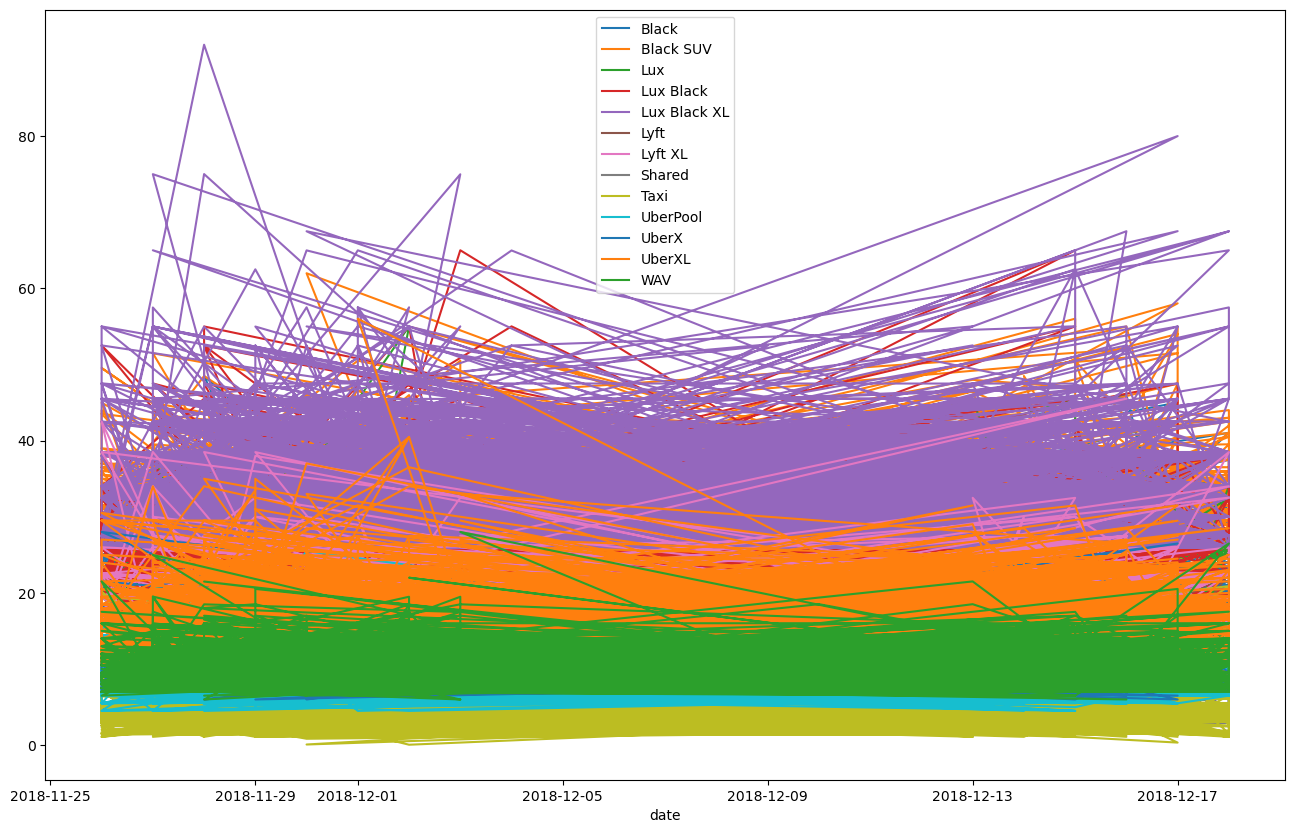

In [104]:
df_merged.set_index('date').groupby('name')['price'].plot(legend=True)


C:\Users\karti\AppData\Local\Temp\ipykernel_8520\862715380.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_merged.price, rug=True, rug_kws={"color": "g"},


<Axes: xlabel='price', ylabel='Density'>

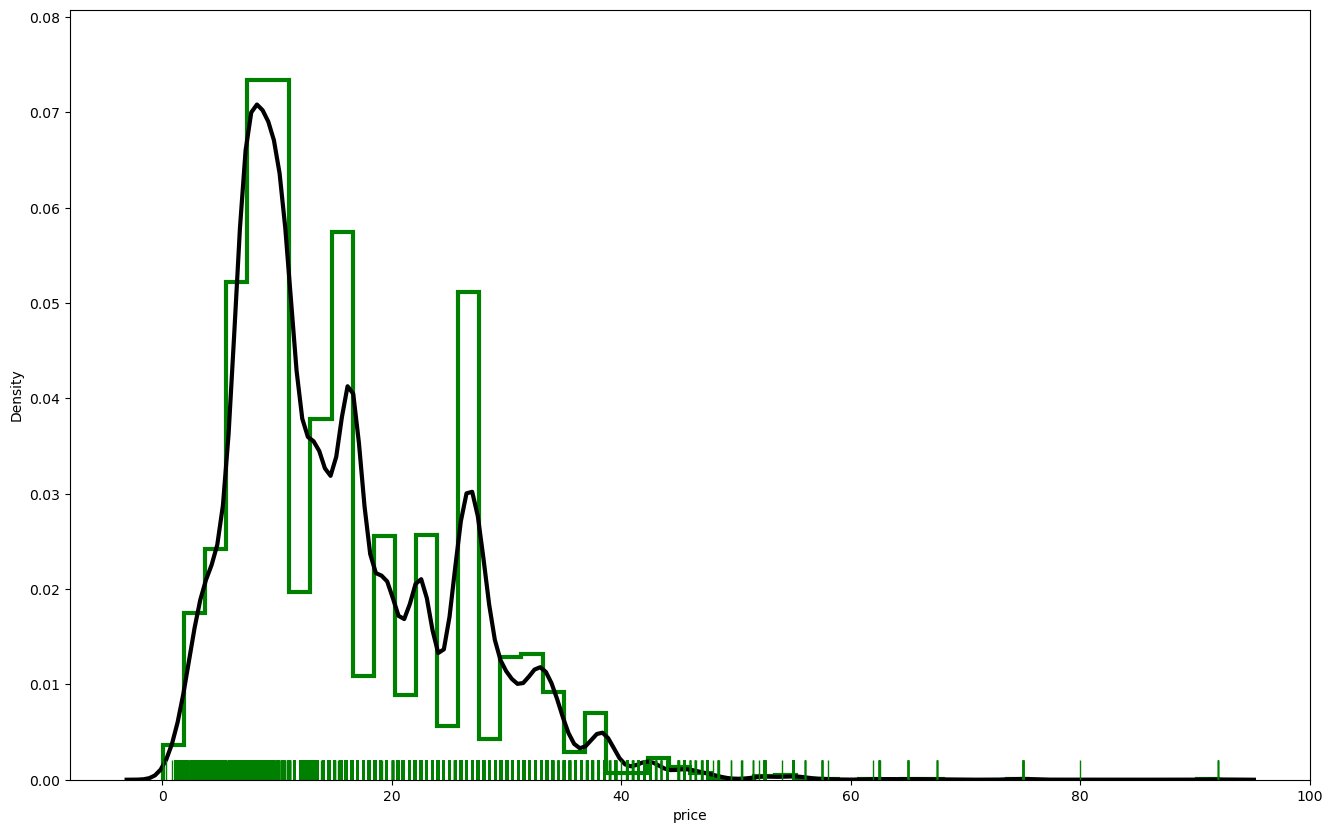

In [106]:
sns.distplot(df_merged.price, rug=True, rug_kws={"color": "g"},
                   kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                   hist_kws={"histtype": "step", "linewidth": 3,
                             "alpha": 1, "color": "g"})

## Splitting into uber and lyft

We have decided to split the dataset to uber and lyft  so that we can generate predictions seperately .Another reason for the split was to find interesting association rules among uber and lyft data seperately.

In [109]:
#Dropping certain columns as they are not neccessary for predictions
df_merged = df_merged.drop(['date_time','id','product_id'], axis=1)
f_merged = df_merged.drop(['fare_per_mile','surge_multiplier'],axis=1)
df_merged = df_merged.loc[:, df_merged.columns !='merge_date']

KeyError: "['date_time'] not found in axis"

In [43]:
#Splitting the dataset
OverallData = df_merged.drop(['cab_type'],axis=1)
uber = df_merged[df_merged['cab_type']=='Uber']
uber.reset_index(inplace=True)
uber.drop('index', axis=1, inplace=True)
lyft = df_merged[df_merged['cab_type']=='Lyft']
lyft.reset_index(inplace=True)
lyft.drop('index', axis=1, inplace=True)

/usr/local/lib/python3.5/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [44]:
#Removing the cab type from uber and lyft
uber.drop('cab_type', axis=1, inplace=True)
lyft.drop('cab_type', axis=1, inplace=True)

In [45]:
#Overview of all the columns present
print(OverallData.columns)
print(uber.columns)
print(lyft.columns)

Index(['distance', 'destination', 'source', 'price', 'surge_multiplier',
       'name', 'date', 'day', 'hour', 'fare_per_mile', 'temp', 'clouds',
       'pressure', 'rain', 'humidity', 'wind'],
      dtype='object')
Index(['distance', 'destination', 'source', 'price', 'surge_multiplier',
       'name', 'date', 'day', 'hour', 'fare_per_mile', 'temp', 'clouds',
       'pressure', 'rain', 'humidity', 'wind'],
      dtype='object')
Index(['distance', 'destination', 'source', 'price', 'surge_multiplier',
       'name', 'date', 'day', 'hour', 'fare_per_mile', 'temp', 'clouds',
       'pressure', 'rain', 'humidity', 'wind'],
      dtype='object')


### Transformations in Data Preprocessing

In this specific stage we are getting our data ready inorder to apply machine learning models.We first need to split our data into train and test set so that we can apply changes to only the relevant features.Here price is the target variable and the other features excluding time are predictor variables.



In [46]:
Xd = OverallData.loc[:, OverallData.columns != 'price']
yd = OverallData['price']
Xd_train,Xd_test,yd_train,yd_test = train_test_split(Xd,yd,test_size = 0.33, random_state=42)

In [47]:
Xu = uber.loc[:, uber.columns != 'price']
yu = uber['price']
Xu_train,Xu_test,yu_train,yu_test = train_test_split(Xu,yu,test_size = 0.33, random_state=42)

In [48]:
Xl = lyft.loc[:, lyft.columns != 'price']
yl = lyft['price']
Xl_train,Xl_test,yl_train,yl_test = train_test_split(Xl,yl,test_size = 0.33, random_state=42)

## PIPELINING
A machine learning pipeline is used to help automate machine learning workflows. They operate by enabling a sequence of data to be transformed and correlated together in a model that can be tested and evaluated to achieve an outcome, whether positive or negative.<br>
We need to sequentially apply a list of transforms and a final estimator. Intermediate steps of pipeline must implement fit and transform methods and the final estimator only needs to implement fit.


### Standardization
We want to apply standardization on our variables before fitting it into a model and performing prediction.The method we chose is StandarScalar.We need to make sure that the categorical variables are encoded.We use One hot encoder method for that purpose.

### Modelling
The dataset that we are using is a large data set with high dimensionality.We have decided to use 'RandomForest' modeling technique as it provides higher accuracy and has the power to handle a large data set with higher dimensionality. This is an Ensemble learning method.<br>
 - As the target variable 'Price' is a continuous valued, we are using 'RandomForest Regressor' instead of RandomForest Classifier.
 - We have decided to used 'k-fold Cross Validation' with Random Forest Regressor model for model validation (to assess the effectiveness of the model) and to mitigate overfitting in order to ensure more accurancy in the results.
 - To measure accuracy of the predictions we are using MAE and MAPE.

In [49]:
numerical_features = Xu.dtypes == 'float'
categorical_features = ~numerical_features
preprocess = make_column_transformer(
(numerical_features, StandardScaler()),
(categorical_features, OneHotEncoder()))
rt = RandomForestRegressor(n_estimators=200,random_state = 42)


/usr/local/lib/python3.5/dist-packages/sklearn/compose/_column_transformer.py:778: DeprecationWarning: `make_column_transformer` now expects (transformer, columns) as input tuples instead of (columns, transformer). This has been introduced in v0.20.1. `make_column_transformer` will stop accepting the deprecated (columns, transformer) order in v0.22.
  warnings.warn(message, DeprecationWarning)


In [50]:
#Modelling for uber
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn import metrics

pipe = make_pipeline(preprocess, rt)
pipe.fit(Xu_train, yu_train)
yu_pred = pipe.predict(Xu_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(yu_test, yu_pred))
print('Mean Squared Error:', metrics.mean_squared_error(yu_test, yu_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yu_test, yu_pred)))
print('Mean Absolute Percentage Error:', np.mean(np.abs((yu_test - yu_pred) / yu_test)) * 100)

Mean Absolute Error: 0.17707342180733668
Mean Squared Error: 0.3534802362485917
Root Mean Squared Error: 0.5945420390927724
Mean Absolute Percentage Error: 1.4677660421411984


Accuracy is 100-MAPE = 98.53

In [51]:
#Modelling for lyft
pipe = make_pipeline(preprocess, rt)
pipe.fit(Xl_train, yl_train)
yl_pred = pipe.predict(Xl_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(yl_test, yl_pred))
print('Mean Squared Error:', metrics.mean_squared_error(yu_test, yu_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yl_test, yl_pred)))
print('Mean Absolute Percentage Error:', np.mean(np.abs((yl_test - yl_pred) / yl_test)) * 100)

Mean Absolute Error: 0.24732696633594067
Mean Squared Error: 0.3534802362485917
Root Mean Squared Error: 0.7895538422113585
Mean Absolute Percentage Error: 1.3403365386591908


Accuracy is (100-MAPE) = 98.65

In [52]:
#Modelling for Complete dataset
pipe = make_pipeline(preprocess, rt)
pipe.fit(Xd_train, yd_train)
yd_pred = pipe.predict(Xd_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(yd_test, yd_pred))
print('Mean Squared Error:', metrics.mean_squared_error(yd_test, yd_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yd_test, yd_pred)))
print('Mean Absolute Percentage Error:', np.mean(np.abs((yd_test - yd_pred) / yd_test)) * 100)

Mean Absolute Error: 0.11387533163825382
Mean Squared Error: 0.15532908032641618
Root Mean Squared Error: 0.39411810454027124
Mean Absolute Percentage Error: 0.8531524654489488


Accuracy is (100-MAPE) = 99.14

## Using 5-fold Cross Validation gave higher accuracy

<b> Below is the Cross validation scores for Uber, Lyft and Overall data respectively. We observe that Accuracy of the model is increased with 5-fold cross-validation </b> 

In [53]:
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(estimator = pipe, X = Xu, y = yu, cv = 5)
print("Mean Accuracy :", cvs.mean()*100)
print("Mean Standard Deviation :", cvs.std())

cvs = cross_val_score(estimator = pipe, X = Xl, y = yl, cv = 5)
print("Mean Accuracy :", cvs.mean()*100)
print("Mean Standard Deviation :", cvs.std())

cvs = cross_val_score(estimator = pipe, X = Xd, y = yd, cv = 5)
print("Mean Accuracy :", cvs.mean()*100)
print("Mean Standard Deviation :", cvs.std())

Mean Accuracy : 99.51110939200852
Mean Standard Deviation : 0.0011975396313715582
Mean Accuracy : 99.48660271912983
Mean Standard Deviation : 0.001380351348546771
Mean Accuracy : 99.8046493777206
Mean Standard Deviation : 0.0007275498571609277


# Association Rules
Apriori is an algorithm for frequent item set mining and association rule learning over relational databases. It proceeds by identifying the frequent individual items in the database and extending them to larger and larger item sets as long as those item sets appear sufficiently often in the database.
There are three major components of Apriori algorithm:

1) Support<br>
2) Confidence<br>
3) Lift<br>

### Support
Support refers to the default popularity of an item and can be calculated by finding number of transactions containing a particular item divided by total number of transactions. Suppose we want to find support for item B. This can be calculated as:<br>
<br>
<font color="red"><center>Support(B) = (Transactions containing (B))/(Total Transactions)<br></center></font>

### Confidence
Confidence refers to the likelihood that an item B is also bought if item A is bought. It can be calculated by finding the number of transactions where A and B are bought together, divided by total number of transactions where A is bought. Mathematically, it can be represented as:
<br>
<br>
<font color="red"><center>Confidence(A→B) = (Transactions containing both (A and B))/(Transactions containing A)<br></center></font>

### Lift
Lift(A -> B) refers to the increase in the ratio of sale of B when A is sold. Lift(A –> B) can be calculated by dividing Confidence(A -> B) divided by Support(B). Mathematically it can be represented as:
<br>
<br>
<font color="red"><center>Lift(A→B) = (Confidence (A→B))/(Support (B))<br></center></font>


## Uber Data

In [108]:
uber_a=uber.copy()
print(uber_a['price'].max())
print(uber_a['price'].min())
print(uber_a['distance'].max())
print(uber_a['distance'].min())

61.98240000000001
0.055999999999999994
7.46
0.02


In [109]:
price_bins = [0,5,15,30,45,60]
price_categories = ['very low price','low price','medium range price','high price','very high price']
uber_a['price'] = pd.cut(uber_a['price'], price_bins, labels = price_categories)

In [110]:
distance_bins = [0,1,2.5,4,5,6]
distance_categories = ['very less distance','less distance','medium range distance','far ','too far']
uber_a['distance'] = pd.cut(uber_a['distance'], distance_bins, labels = distance_categories)

The Apriori library we are going to use requires our dataset to be in the form of a list of lists, where the whole dataset is a big list and each transaction in the dataset is an inner list within the outer big list. Currently we have data in the form of a pandas dataframe. To convert our pandas dataframe into a list of lists, execute the following script:

In [111]:
from apyori import apriori
uber_b=uber_a[['destination','price','source','name']]
records = []
for i in range(0,16412):
    records.append([str(uber_b.values[i,j]) for j in range(0, 4)])

### Applying Apriori
The next step is to apply the Apriori algorithm on the dataset. To do so, we can use the apriori class that we imported from the apyori library.

The apriori class requires some parameter values to work. The first parameter is the list of list that you want to extract rules from. The second parameter is the min_support parameter. This parameter is used to select the items with support values greater than the value specified by the parameter. Next, the min_confidence parameter filters those rules that have confidence greater than the confidence threshold specified by the parameter. Similarly, the min_lift parameter specifies the minimum lift value for the short listed rules. Finally, the min_length parameter specifies the minimum number of items that you want in your rules.

In [112]:
rules = apriori(records, min_support=0.01, min_confidence=0.6, min_lift=4, min_length=2)

In [113]:
for item in rules:

    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    #second index of the inner list
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("******************************")

Rule: high price -> Black SUV
Support: 0.054106751157689495
Confidence: 0.896969696969697
Lift: 6.299129938667808
******************************
Rule: very low price -> Taxi
Support: 0.06458688764318792
Confidence: 0.9878844361602982
Lift: 6.881646590094573
******************************
Rule: very low price -> Taxi
Support: 0.014928101389227394
Confidence: 1.0
Lift: 6.966044142614601
******************************
Rule: high price -> Black SUV
Support: 0.01389227394589325
Confidence: 0.6333333333333334
Lift: 10.499259259259262
******************************
Rule: high price -> Fenway
Support: 0.01529368754569827
Confidence: 0.6048192771084338
Lift: 10.026559571619813
******************************
Rule: high price -> North Station
Support: 0.011333170850597124
Confidence: 0.9893617021276596
Lift: 6.947969300521673
******************************
Rule: high price -> Black SUV
Support: 0.012856446502559103
Confidence: 0.9017094017094017
Lift: 6.332415361940394
***************************

## Lyft Data

In [114]:
lyft_a=lyft.copy()
print(lyft_a['price'].max())
print(lyft_a['price'].min())
print(lyft_a['distance'].max())
print(lyft_a['distance'].min())

91.99849999999999
2.4888
5.45
0.4


In [115]:
price_bins = [0,5,15,30,45,60]
price_categories = ['very low price','low price','medium range price','high price','very high price']
lyft_a['price'] = pd.cut(lyft_a['price'], price_bins, labels = price_categories)

In [116]:
distance_bins = [0,1,2.5,4,5,6]
distance_categories = ['very less distance','less distance','medium range distance','far ','too far']
lyft_a['distance'] = pd.cut(lyft_a['distance'], distance_bins, labels = distance_categories)

In [118]:
from apyori import apriori
lyft_b=lyft_a[['destination','price','source','name']]
records = []
for i in range(0,13455):
    records.append([str(lyft_b.values[i,j]) for j in range(0, 4)])

In [121]:
rules = apriori(records, min_support=0.01, min_confidence=0.6, min_lift=4, min_length=2)

In [122]:
for item in rules:

    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    #second index of the inner list
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("******************************")

Rule: high price -> Lux Black XL
Support: 0.07699739873652917
Confidence: 0.7606461086637298
Lift: 4.530541563554885
******************************
Rule: Shared -> very low price
Support: 0.058788554440728356
Confidence: 0.9974779319041616
Lift: 6.015717424370459
******************************
Rule: high price -> Lux Black XL
Support: 0.011668524712002974
Confidence: 0.8219895287958116
Lift: 4.895913727289794
******************************
Rule: high price -> Lux Black XL
Support: 0.013600891861761426
Confidence: 0.8883495145631067
Lift: 5.291165435345994
******************************
Rule: high price -> Boston University
Support: 0.01642512077294686
Confidence: 0.638728323699422
Lift: 6.309904255048255
******************************
Rule: high price -> Fenway
Support: 0.021924934968413228
Confidence: 0.7375
Lift: 7.285655286343613
******************************
Rule: Shared -> Financial District
Support: 0.012783351913786696
Confidence: 0.9885057471264367
Lift: 5.961606825453252
****

We were able to generate some interesting rules in both uber and lyft.Some of them include that if your cab ride is taxi your ride price will be very low.Also some observations such as most people who go to the  North Station location prefer going in Shared Cab type.There are several other rules that were formed.However we found it interesting that some of these  rules are common for both uber and lyft data.